In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [ ]:
df = pd.read_csv("telecom.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape


(7043, 21)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Understand Target Variable (Churn)


,count
Churn,
No,5174
Yes,1869


Show me the percentage of customers who churned and who stayed



In [ ]:
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].dtype  # dtype O means the type of data is object(string).


dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Re-check Missing Values


In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df = df.dropna()


In [ ]:
df.shape


(7032, 21)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

check for duplicates


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates()


In [ ]:
churn_counts = df['Churn'].value_counts()


In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<BarContainer object of 2 artists>

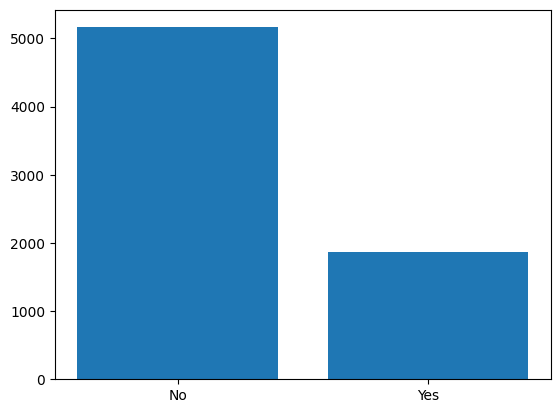

In [ ]:
plt.bar(churn_counts.index, churn_counts.values)


Text(0, 0.5, 'Number of Customers')

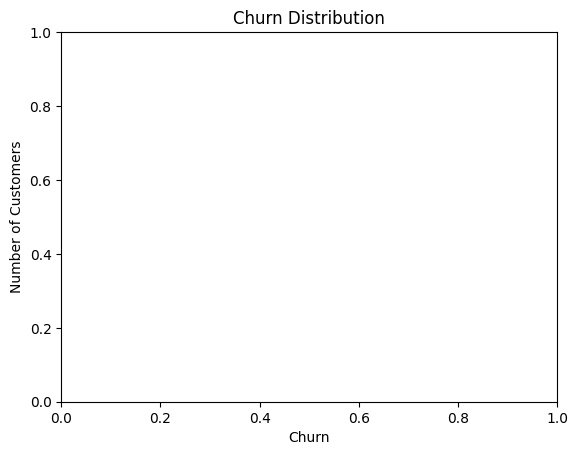

In [ ]:

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")



In [ ]:
plt.show()


In [ ]:
df['Churn'].value_counts(normalize=True) * 100



,proportion
Churn,
No,73.421502
Yes,26.578498


***How does customer churn vary across different contract types?***

This analysis shows how customer churn differs for Month-to-month, One-year, and Two-year contract customers. The chart compares the number of customers who stayed and those who churned for each contract type.

**Conclusion**

Month-to-month customers have the highest churn, which means they are more likely to leave the service.
Customers with long-term contracts (One-year and Two-year) show better retention and are more loyal.

This suggests that encouraging customers to move to longer-term contracts can help reduce churn.

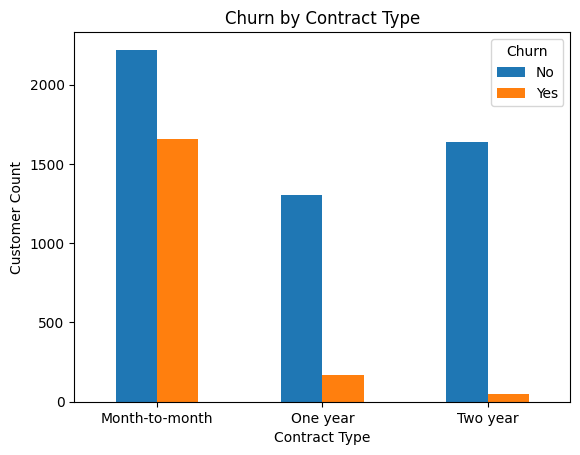

In [ ]:
contract_churn.plot(kind='bar')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=0)
plt.show()

***How does customer churn vary across different payment methods?***

The bar chart shows the number of customers who stayed and who churned for each payment method. It compares how payment options like electronic check, credit card, bank transfer, and mailed check are related to customer churn.

**Conclusion**

Some payment methods have a higher number of churned customers, which suggests that customers using certain payment types are more likely to leave the service.
This insight can help the company focus on improving the experience or offers for customers using high-churn payment methods.

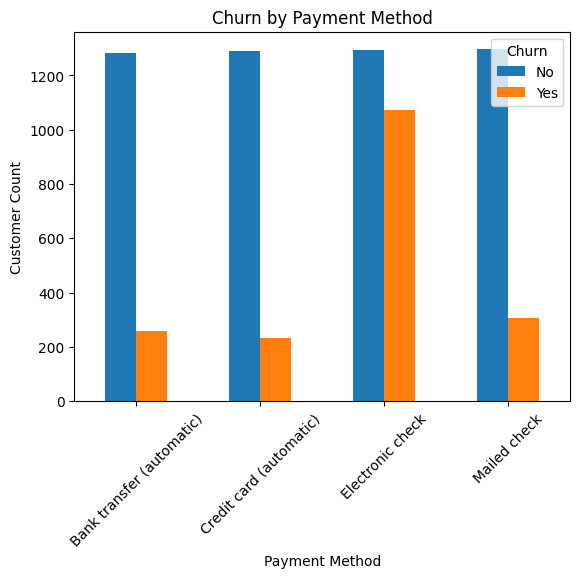

In [ ]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_churn.plot(kind='bar')
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()



***How does customer tenure differ between churned and active customers?***

The histogram compares the number of months (tenure) for churned and active customers. It shows how long customers stayed with the company before leaving or continuing their service.

**Conclusion**

Most churned customers have shorter tenure, meaning they leave within the first few months.
Customers who stay longer are more likely to remain active, indicating that customer loyalty increases over time.
This suggests that improving the experience of new customers can help reduce churn.

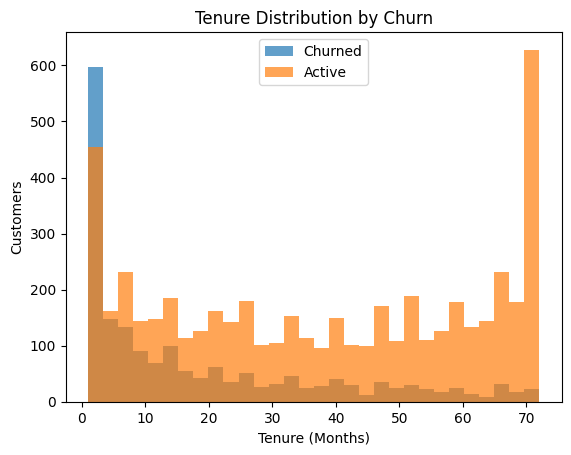

In [ ]:
plt.figure()
plt.hist(df[df['Churn'] == 'Yes']['tenure'], bins=30, alpha=0.7, label='Churned')
plt.hist(df[df['Churn'] == 'No']['tenure'], bins=30, alpha=0.7, label='Active')
plt.legend()
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customers")
plt.show()


***Do monthly charges affect customer churn?***

This box plot compares the monthly charges of customers who churned with those who stayed. It shows the distribution of monthly charges for both churned and active customers.

**Conclusion**

Churned customers generally have higher monthly charges compared to active customers.
This suggests that customers paying more are more likely to leave, possibly due to dissatisfaction with pricing.
Reducing costs or offering better plans to high-paying customers may help lower churn.

/tmp/ipython-input-1256813623.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


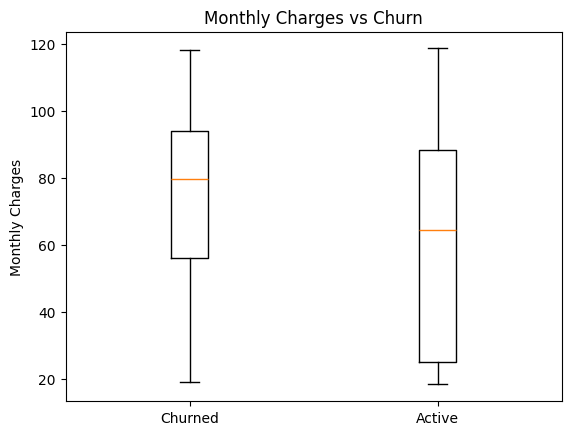

In [ ]:
plt.figure()
plt.boxplot(
    [df[df['Churn']=='Yes']['MonthlyCharges'],
     df[df['Churn']=='No']['MonthlyCharges']],
    labels=['Churned', 'Active'])
plt.title("Monthly Charges vs Churn")
plt.ylabel("Monthly Charges")
plt.show()


Create tenure buckets

In [ ]:
df['tenure_group'] = pd.cut(  #create tenure group
    df['tenure'],
    bins=[0, 6, 12, 24, df['tenure'].max()],
    labels=['0-6 Months', '6-12 Months', '1-2 Years', '2+ Years']
)

***How does customer churn vary across different tenure groups?***

This chart compares the number of churned and active customers across different tenure groups. It shows how long customers stayed with the company before leaving or continuing.

**Conclusion**

Customers with shorter tenure have a higher churn rate, meaning new customers are more likely to leave.
Customers who stay longer show better retention and are more loyal.
This suggests that improving the experience of new customers can significantly reduce churn.

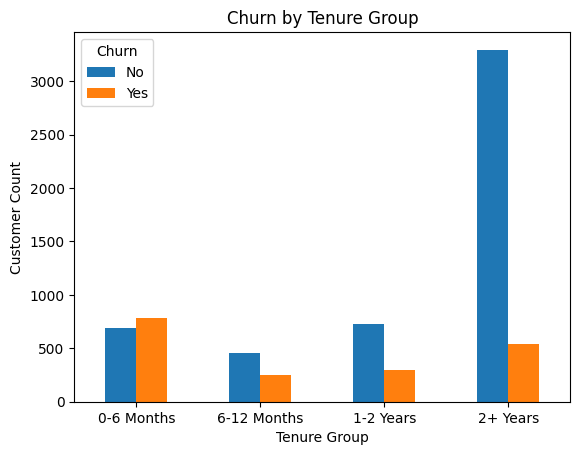

In [ ]:
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'])
tenure_churn.plot(kind='bar')
plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Customer Count")
plt.xticks(rotation=0)
plt.show()


It calculates:
The average (mean) monthly bill of all customers

So it tells:
On average, how much a customer pays every month.

In [ ]:
avg_monthly_charge = df['MonthlyCharges'].mean()
avg_monthly_charge

np.float64(64.79820819112628)

***Which customers are at the highest risk of churning?***

This code identifies customers who are on month-to-month contracts, have been with the company for less than 6 months, and are paying more than the average monthly charge.

**Conclusion**

These customers are high-risk churn customers and should be targeted with discounts, loyalty offers, or better plans to reduce customer loss.

In [ ]:
high_risk_customers = df[
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 6) &
    (df['MonthlyCharges'] > avg_monthly_charge)
]


In [ ]:
high_risk_customers.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6 Months
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,0-6 Months
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,0-6 Months
47,7760-OYPDY,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes,0-6 Months
65,5122-CYFXA,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.30,244.10,No,0-6 Months


In [ ]:
high_risk_customers.shape[0]   #shape tells rows and columns and 0 in bracket means rows 1 means column


597

***Who are the most loyal customers?***

This code identifies customers who have stayed with the company for more than two years, have not churned, and are paying below the average monthly charge.

**Conclusion**

These customers are highly loyal and should be rewarded with special offers or loyalty programs to keep them engaged.

In [ ]:
loyal_customers = df[
    (df['tenure'] > 24) &
    (df['Churn'] == 'No') &
    (df['MonthlyCharges'] < avg_monthly_charge)
]


In [ ]:
loyal_customers.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2+ Years
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2+ Years
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,2+ Years
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,2+ Years
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No,2+ Years


In [ ]:
loyal_customers.shape[0]


1371

How many customers fall into high-risk and loyal segments?

In [ ]:
segment_counts = pd.DataFrame({
    'Segment': ['High Risk', 'Loyal'],
    'Customers': [high_risk_customers.shape[0], loyal_customers.shape[0]]
})

segment_counts


,Segment,Customers
0,High Risk,597
1,Loyal,1371


In [ ]:
high_risk_customers.to_csv("high_risk_customers.csv", index=False)
loyal_customers.to_csv("loyal_customers.csv", index=False)
